In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

e:\Python3.9\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from collections import Counter

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
sns.set(style='white', context='notebook', palette='deep')

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df = df.dropna()

In [10]:
df['capital.gain'].value_counts()

0        28129
15024      343
7688       278
7298       244
99999      155
         ...  
6097         1
1639         1
7978         1
2387         1
22040        1
Name: capital.gain, Length: 118, dtype: int64

In [18]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [9]:
index_names = df[ df['workclass'] == 'Never-worked'].index
index_names1 = df[ df['workclass'] == '?'].index
index_names2 = df[ df['workclass'] == 'Without-pay'].index
index_names3 = df[ df['occupation'] == 'Armed-Forces'].index
df.drop(index_names,inplace = True)
df.drop(index_names1,inplace = True)
df.drop(index_names2,inplace = True)
df.drop(index_names3,inplace = True)
#df = df.drop(columns=['fnlwgt'])

In [10]:
numerical = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income', 'marital.status']

categorical = ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [11]:
#Income counts 0 = <50k while 1 = >50k
#plt.figure(figsize = (9,8))
#with sns.color_palette("PuRd"):sns.countplot(df['income'], label='Count')
#plt.show()

C:\Users\robin\AppData\Local\Temp\ipykernel_20052\1955915394.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  with sns.color_palette("PuRd"):sns.heatmap(df[numerical].corr(), annot = True, fmt = ".2f")


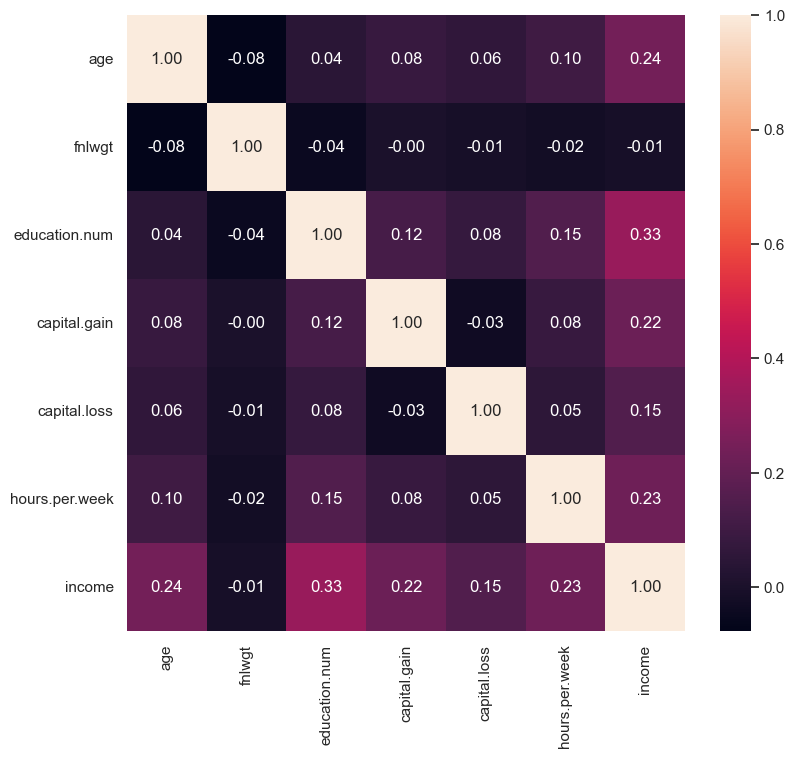

In [12]:
#Correlation heatmap
plt.figure(figsize = (9,8))
with sns.color_palette("PuRd"):sns.heatmap(df[numerical].corr(), annot = True, fmt = ".2f")
plt.show()

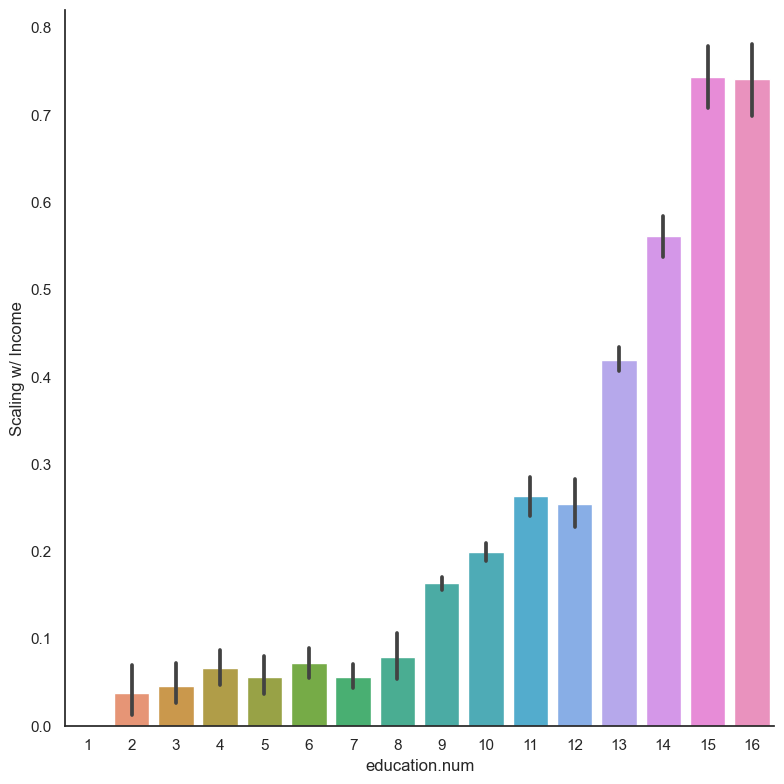

In [13]:
#Education num vs Income
with sns.color_palette("PuRd"): g =sns.catplot(x="education.num", y="income", data=df, kind="bar", height = 8)
g.set_ylabels("Scaling w/ Income")

In [14]:
#Grouping ages
def age_group(x):
    x = int(x)
    x = abs(x)
    if(17 < x < 30):
        return "18-29"
    if(29 < x < 40):
        return "30-39"
    if(39 < x < 50):
        return "40-49"
    if(49 < x < 60):
        return "50-59"
    else:
        return "More than 60"
df['age_group'] = df['age'].apply(age_group)

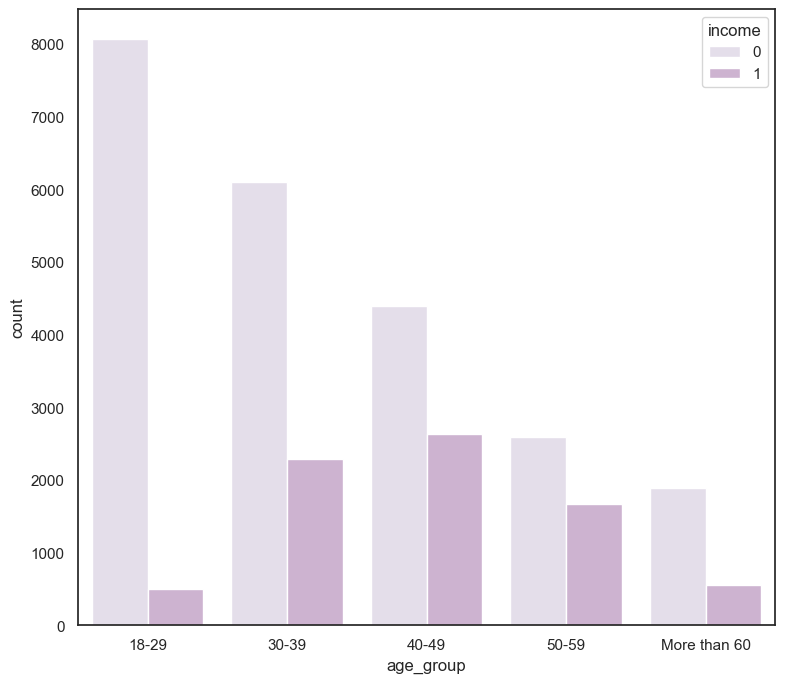

In [15]:
#Age vs Income
plt.figure(figsize=(9,8))
order_list = ['18-29', '30-39', '40-49', '50-59', 'More than 60']
with sns.color_palette("PuRd"):sns.countplot(x= df['age_group'], hue = df['income'], order=order_list)

In [16]:
#Categorical

In [17]:
df["native.country"].iloc[df["native.country"] != "United-States"] = "Other"
df["native.country"] = df["native.country"].fillna("Other")

C:\Users\robin\AppData\Local\Temp\ipykernel_20052\2588403718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["native.country"].iloc[df["native.country"] != "United-States"] = "Other"


In [18]:
df["income"].value_counts()

0    23046
1     7649
Name: income, dtype: int64

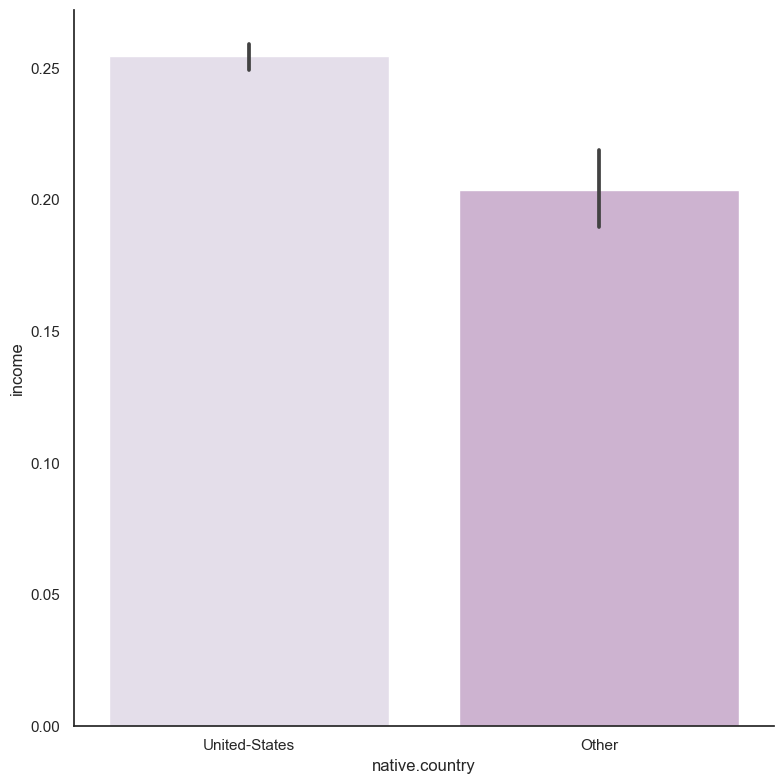

In [19]:
with sns.color_palette("PuRd"): g =sns.catplot(x="native.country", y="income", data=df, kind="bar", height = 8)
plt.show()

In [20]:
df = df.fillna(0)
df['native.country']=df['native.country'].map({'Other': 0, 'United-States': 1})
df["native.country"]=df['native.country'].astype(int)

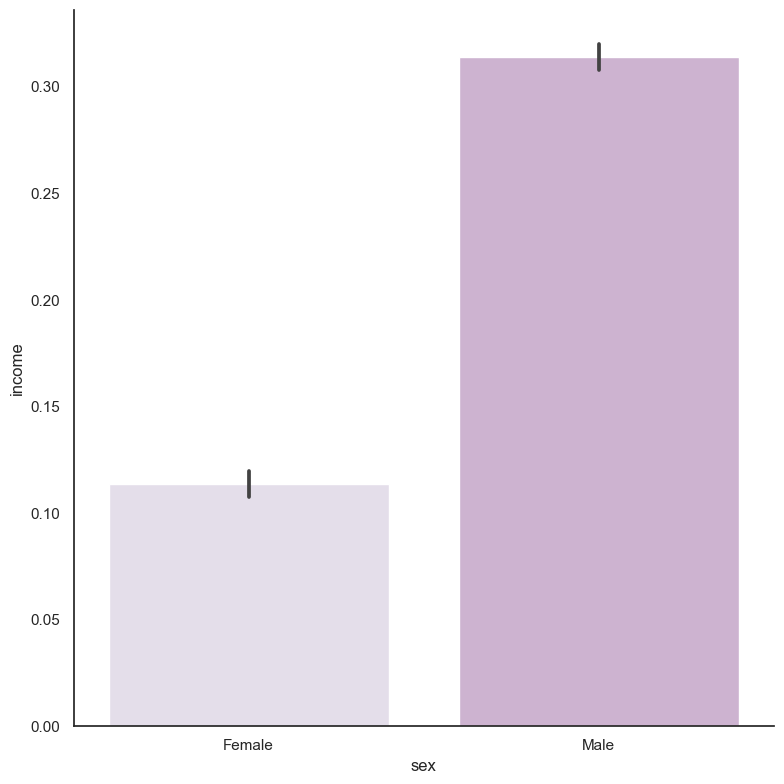

In [21]:
with sns.color_palette("PuRd"): g =sns.catplot(x="sex", y="income", data=df, kind="bar", height = 8)
plt.show()

In [22]:
df['sex']=df['sex'].map({'Female': 0, 'Male': 1})
df['sex']=df['sex'].astype(int)

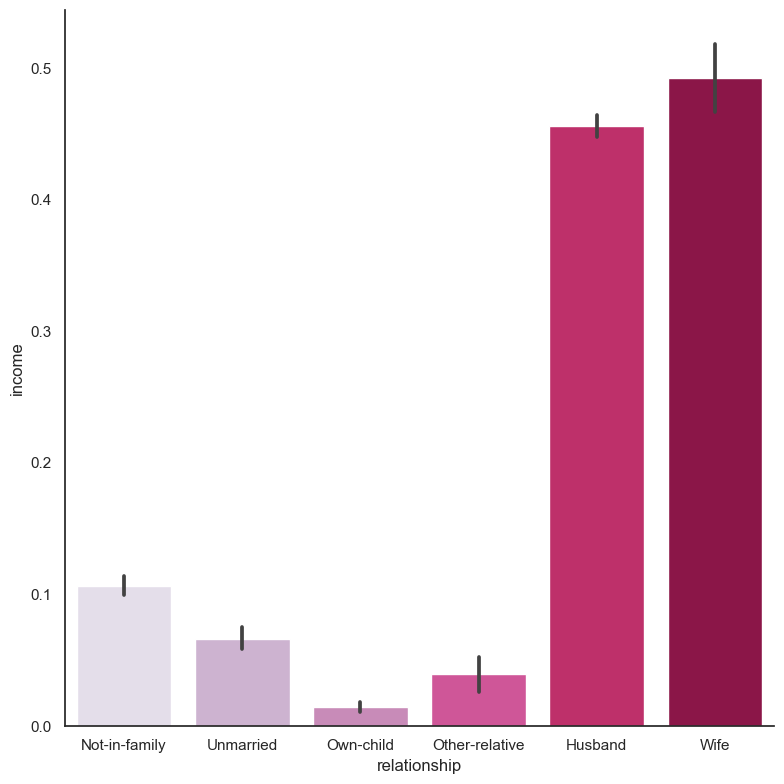

In [23]:
with sns.color_palette("PuRd"): g =sns.catplot(x="relationship", y="income", data=df, kind="bar", height = 8)
plt.show()

In [24]:
df.replace(to_replace=("Widowed", "Divorced", "Never-married", "Separated"), value = "Single", inplace = True)
df.replace(to_replace=("Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"), value = "Married", inplace = True)
df["marital.status"].value_counts()

Single     15958
Married    14737
Name: marital.status, dtype: int64

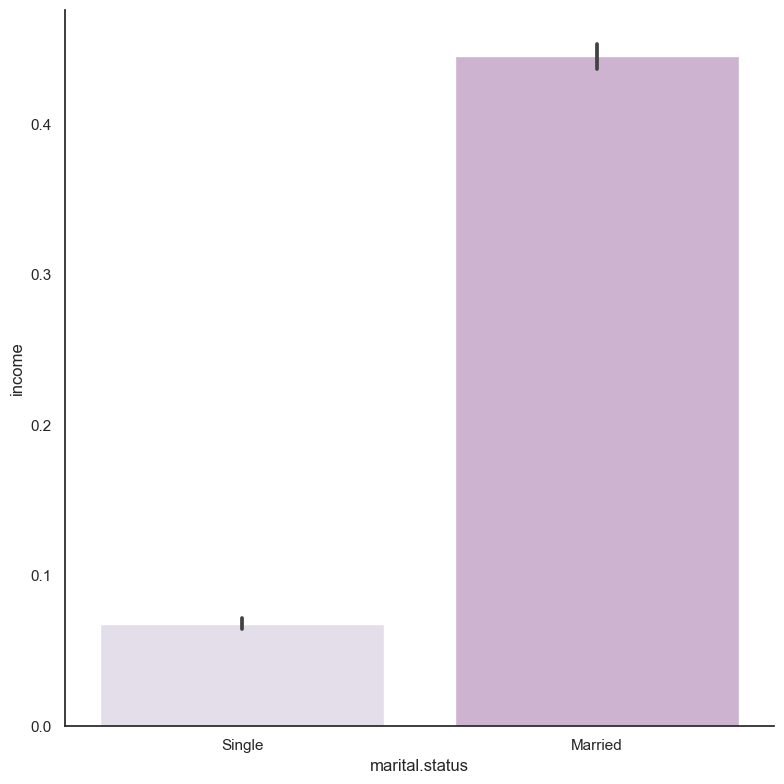

In [25]:
with sns.color_palette("PuRd"): g =sns.catplot(x="marital.status", y="income", data=df, kind="bar", height = 8)
plt.show()

In [26]:
df["marital.status"].value_counts()

Single     15958
Married    14737
Name: marital.status, dtype: int64

In [27]:
df['marital.status']=df['marital.status'].map({'Single': 0, 'Married': 1})
df['marital.status']=df['marital.status'].astype(int)

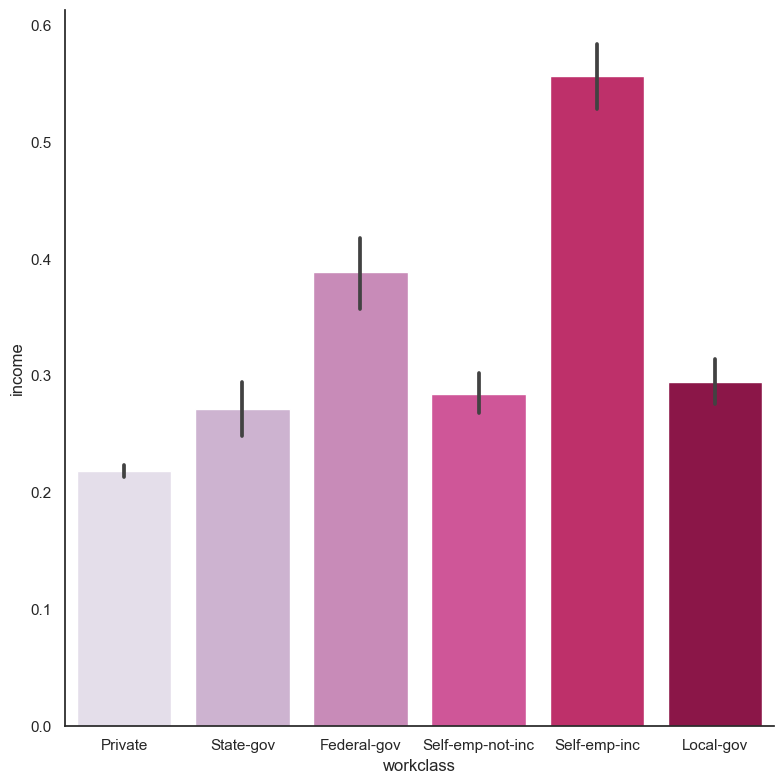

In [28]:
with sns.color_palette("PuRd"): g =sns.catplot(x="workclass", y="income", data=df, kind="bar", height = 8)
plt.show()

In [29]:
#race_index = df[ df['race'] == 'Amer-Indian-Eskimo'].index
#race_index1 = df[ df['race'] == 'Other'].index
#df.drop(race_index, inplace=True)
#df.drop(race_index1, inplace=True)

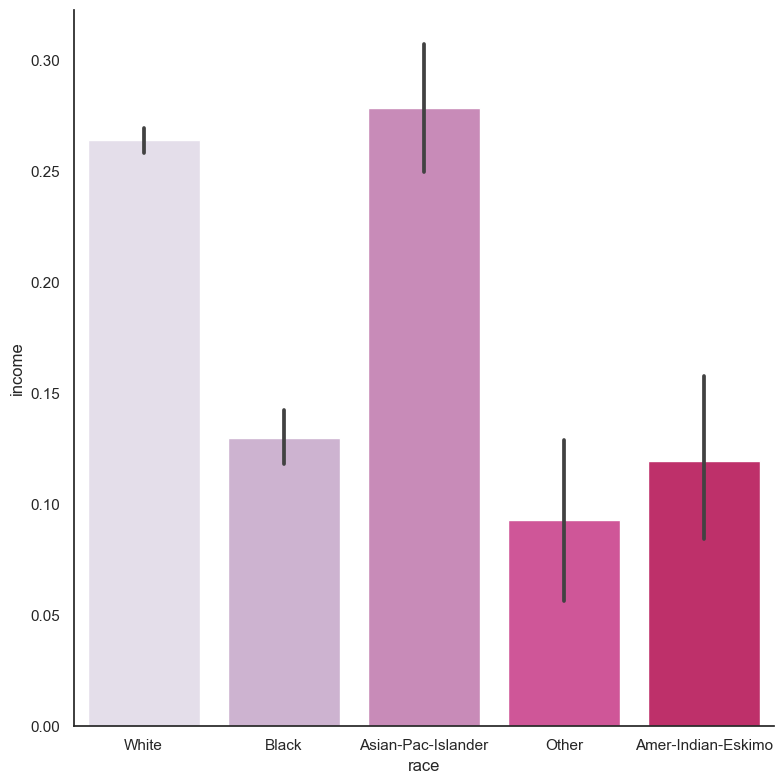

In [30]:
#Income vs Race
with sns.color_palette("PuRd"): g =sns.catplot(x="race", y="income", data=df, kind="bar", height = 8)
plt.show()

In [31]:
df.drop(labels= ["relationship", "race", "workclass", "education", "occupation", "age_group", "capital.gain", "capital.loss", "marital.status", "native.country" ], axis=1, inplace=True)

In [33]:

oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)
# Create a StandardScaler instance for scaling data
scaler = StandardScaler()

# Split the data into training and validation sets
validation_size = 0.30
seed = 7
features_ = df
target = df['income']

X_train, X_validation, Y_train, Y_validation = train_test_split(features_, target,
    test_size=validation_size, random_state=seed)

# Create a StandardScaler instance for scaling data
scaler = StandardScaler()

# Apply oversampling or undersampling to the training data only
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

# Scale the training data and apply the same transformation to the validation data
X_train_rescaled = scaler.fit_transform(X_train_resampled)
X_validation_rescaled = scaler.transform(X_validation)


# Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('Decision Tree Classifier', DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',  # You can try different values here
    criterion='gini',    # or 'entropy'
    class_weight='balanced',  # Adjust based on class distribution       # Set to True for small datasets, but it's not recommended for large ones
    min_impurity_decrease=0.0,
    ccp_alpha=0.0)))
models.append(('Random Forest Classifier', RandomForestClassifier(
    n_estimators=5, 
    max_features=1, 
    max_depth=5, 
    min_samples_split=10, 
    min_samples_leaf=5)))

# Evaluate each model in turn
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),  # Set zero_division to 1
    'recall': make_scorer(recall_score, zero_division=1),        # Set zero_division to 1
    'f1_score': make_scorer(f1_score, zero_division=1),          # Set zero_division to 1
}

# Evaluate each model in turn
kfold = KFold(n_splits=10)
results = {}
names = []
for name, model in models: 
   
    cv_results = cross_validate(model, X_train_resampled, Y_train_resampled, cv=kfold, scoring=scoring)
    
    
    # Store the results
    results[name] = {
        'accuracy': cv_results['test_accuracy'].mean(),
        'precision': cv_results['test_precision'].mean(),
        'recall': cv_results['test_recall'].mean(),
        'f1_score': cv_results['test_f1_score'].mean(),
    }
    
    names.append(name)
    msg = "%s: Accuracy: %f, Precision: %f, Recall: %f, F1-score: %f" % (name, results[name]['accuracy'], results[name]['precision'], results[name]['recall'], results[name]['f1_score'])
    print(msg)

Logistic Regression: Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1-score: 1.000000
Linear Discriminant Analysis: Accuracy: 0.713097, Precision: 0.651306, Recall: 0.751908, F1-score: 0.668613
K Neighbors Classifier: Accuracy: 0.664929, Precision: 0.580514, Recall: 0.769852, F1-score: 0.627510
Decision Tree Classifier: Accuracy: 0.963004, Precision: 0.995005, Recall: 0.951396, F1-score: 0.970870
Gaussian NB: Accuracy: 0.693079, Precision: 0.621907, Recall: 0.813049, F1-score: 0.665839
Random Forest Classifier: Accuracy: 0.987244, Precision: 0.967171, Recall: 0.994302, F1-score: 0.978607


In [34]:
"""
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
#Train Test Split
features_ = df
target = df['income']
X_train, X_validation, Y_train, Y_validation = train_test_split(features_, target,
    test_size=validation_size,random_state=seed)

#X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

# Params for Random Forest
num_trees = 50
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('Logistic Regression', LogisticRegression(max_iter=1100)))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Neighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth=5, min_samples_split=10, min_samples_leaf=5)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_resampled, Y_train_resampled, cv=kfold, scoring='accuracy')
    #cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    """

'\noversampler = RandomOverSampler(random_state=42)\nundersampler = RandomUnderSampler(random_state=42)\n\nvalidation_size = 0.20\nseed = 7\nnum_folds = 10\nscoring = \'accuracy\'\n#Train Test Split\nfeatures_ = df\ntarget = df[\'income\']\nX_train, X_validation, Y_train, Y_validation = train_test_split(features_, target,\n    test_size=validation_size,random_state=seed)\n\n#X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)\nX_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)\n\n# Params for Random Forest\nnum_trees = 50\nmax_features = 3\n\n#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)\nmodels = []\nmodels.append((\'Logistic Regression\', LogisticRegression(max_iter=1100)))\nmodels.append((\'Linear Discriminant Analysis\', LinearDiscriminantAnalysis()))\nmodels.append((\'K Neighbors Classifier\', KNeighborsClassifier()))\nmodels.append((\'Decision Tree Classifier\', DecisionTreeClassifier(max_depth=5, min_samples

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U28'), dtype('<U28')) -> None

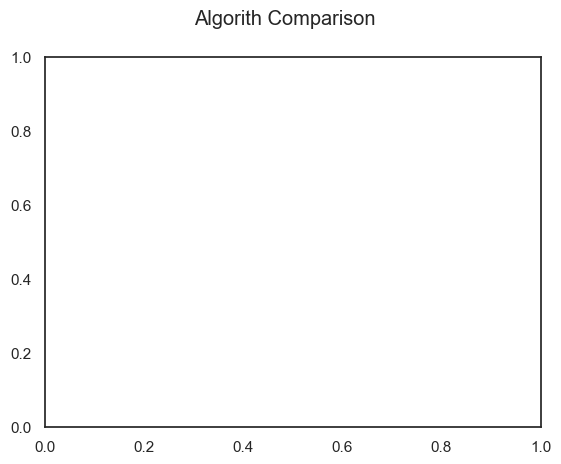

In [35]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# a) Predictions on validation dataset - KNN
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [ ]:
df['income'].value_counts()

In [ ]:
rows_with_question_mark = df[df['workclass'] == "?"]